🧪 MODEL TESTING SETUP:
   Training data: 6,570 records (2021-2023)
   Test data: 2,196 records (2024)
   Sections: 6

=== TRAINING DATA ANALYSIS (2021-2023) ===

📊 CORRELATION ANALYSIS:
   SEC-001: 0.892
   SEC-002: 0.908
   SEC-003: 0.873
   SEC-004: 0.902
   SEC-005: 0.983
   SEC-006: 0.969

📈 TRAINING STATISTICS:
   SEC-001:
      Working days: 727
      Employees: 2.9 ± 1.5 (range: 0-12)
      Task time: 1005 ± 584 minutes
   SEC-002:
      Working days: 727
      Employees: 4.3 ± 1.7 (range: 0-12)
      Task time: 1609 ± 657 minutes
   SEC-003:
      Working days: 727
      Employees: 3.0 ± 1.4 (range: 0-9)
      Task time: 1049 ± 529 minutes
   SEC-004:
      Working days: 727
      Employees: 3.2 ± 1.6 (range: 0-11)
      Task time: 1118 ± 607 minutes
   SEC-005:
      Working days: 727
      Employees: 7.4 ± 3.7 (range: 0-26)
      Task time: 2905 ± 1529 minutes
   SEC-006:
      Working days: 727
      Employees: 6.5 ± 2.6 (range: 0-19)
      Task time: 2504 ± 1087 minutes

==

14:53:51 - cmdstanpy - INFO - Chain [1] start processing
14:53:51 - cmdstanpy - INFO - Chain [1] done processing
14:53:51 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 241 working days
   Forecasting SEC-002...


14:53:51 - cmdstanpy - INFO - Chain [1] done processing
14:53:52 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 241 working days
   Forecasting SEC-003...


14:53:52 - cmdstanpy - INFO - Chain [1] done processing
14:53:52 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 241 working days
   Forecasting SEC-004...


14:53:52 - cmdstanpy - INFO - Chain [1] done processing
14:53:52 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 241 working days
   Forecasting SEC-005...


14:53:53 - cmdstanpy - INFO - Chain [1] done processing
14:53:53 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 241 working days
   Forecasting SEC-006...


14:53:53 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days

=== CONVERTING TO 2024 EMPLOYEE PREDICTIONS ===

=== COMPREHENSIVE EVALUATION ===
🎯 OVERALL PERFORMANCE:
   MAE: 1.45 employees
   RMSE: 2.10 employees
   R²: 0.344
   Records evaluated: 1,446

📊 SECTION-WISE PERFORMANCE:
   SEC-001:
      MAE: 0.98, RMSE: 1.47, R²: -0.114
      Avg task/employee: 354.5 minutes
      Actual avg: 2.7, Predicted avg: 2.4
   SEC-002:
      MAE: 1.32, RMSE: 1.67, R²: -0.039
      Avg task/employee: 371.9 minutes
      Actual avg: 4.0, Predicted avg: 3.7
   SEC-003:
      MAE: 0.99, RMSE: 1.30, R²: -0.100
      Avg task/employee: 364.2 minutes
      Actual avg: 2.7, Predicted avg: 2.7
   SEC-004:
      MAE: 1.05, RMSE: 1.40, R²: -0.205
      Avg task/employee: 348.4 minutes
      Actual avg: 2.9, Predicted avg: 3.0
   SEC-005:
      MAE: 2.59, RMSE: 3.47, R²: -0.084
      Avg task/employee: 388.5 minutes
      Actual avg: 6.8, Predicted avg: 6.4
   SEC-006:
      MAE: 1.76, RMSE: 2.40, R²: -0.084
      Avg task/employee:

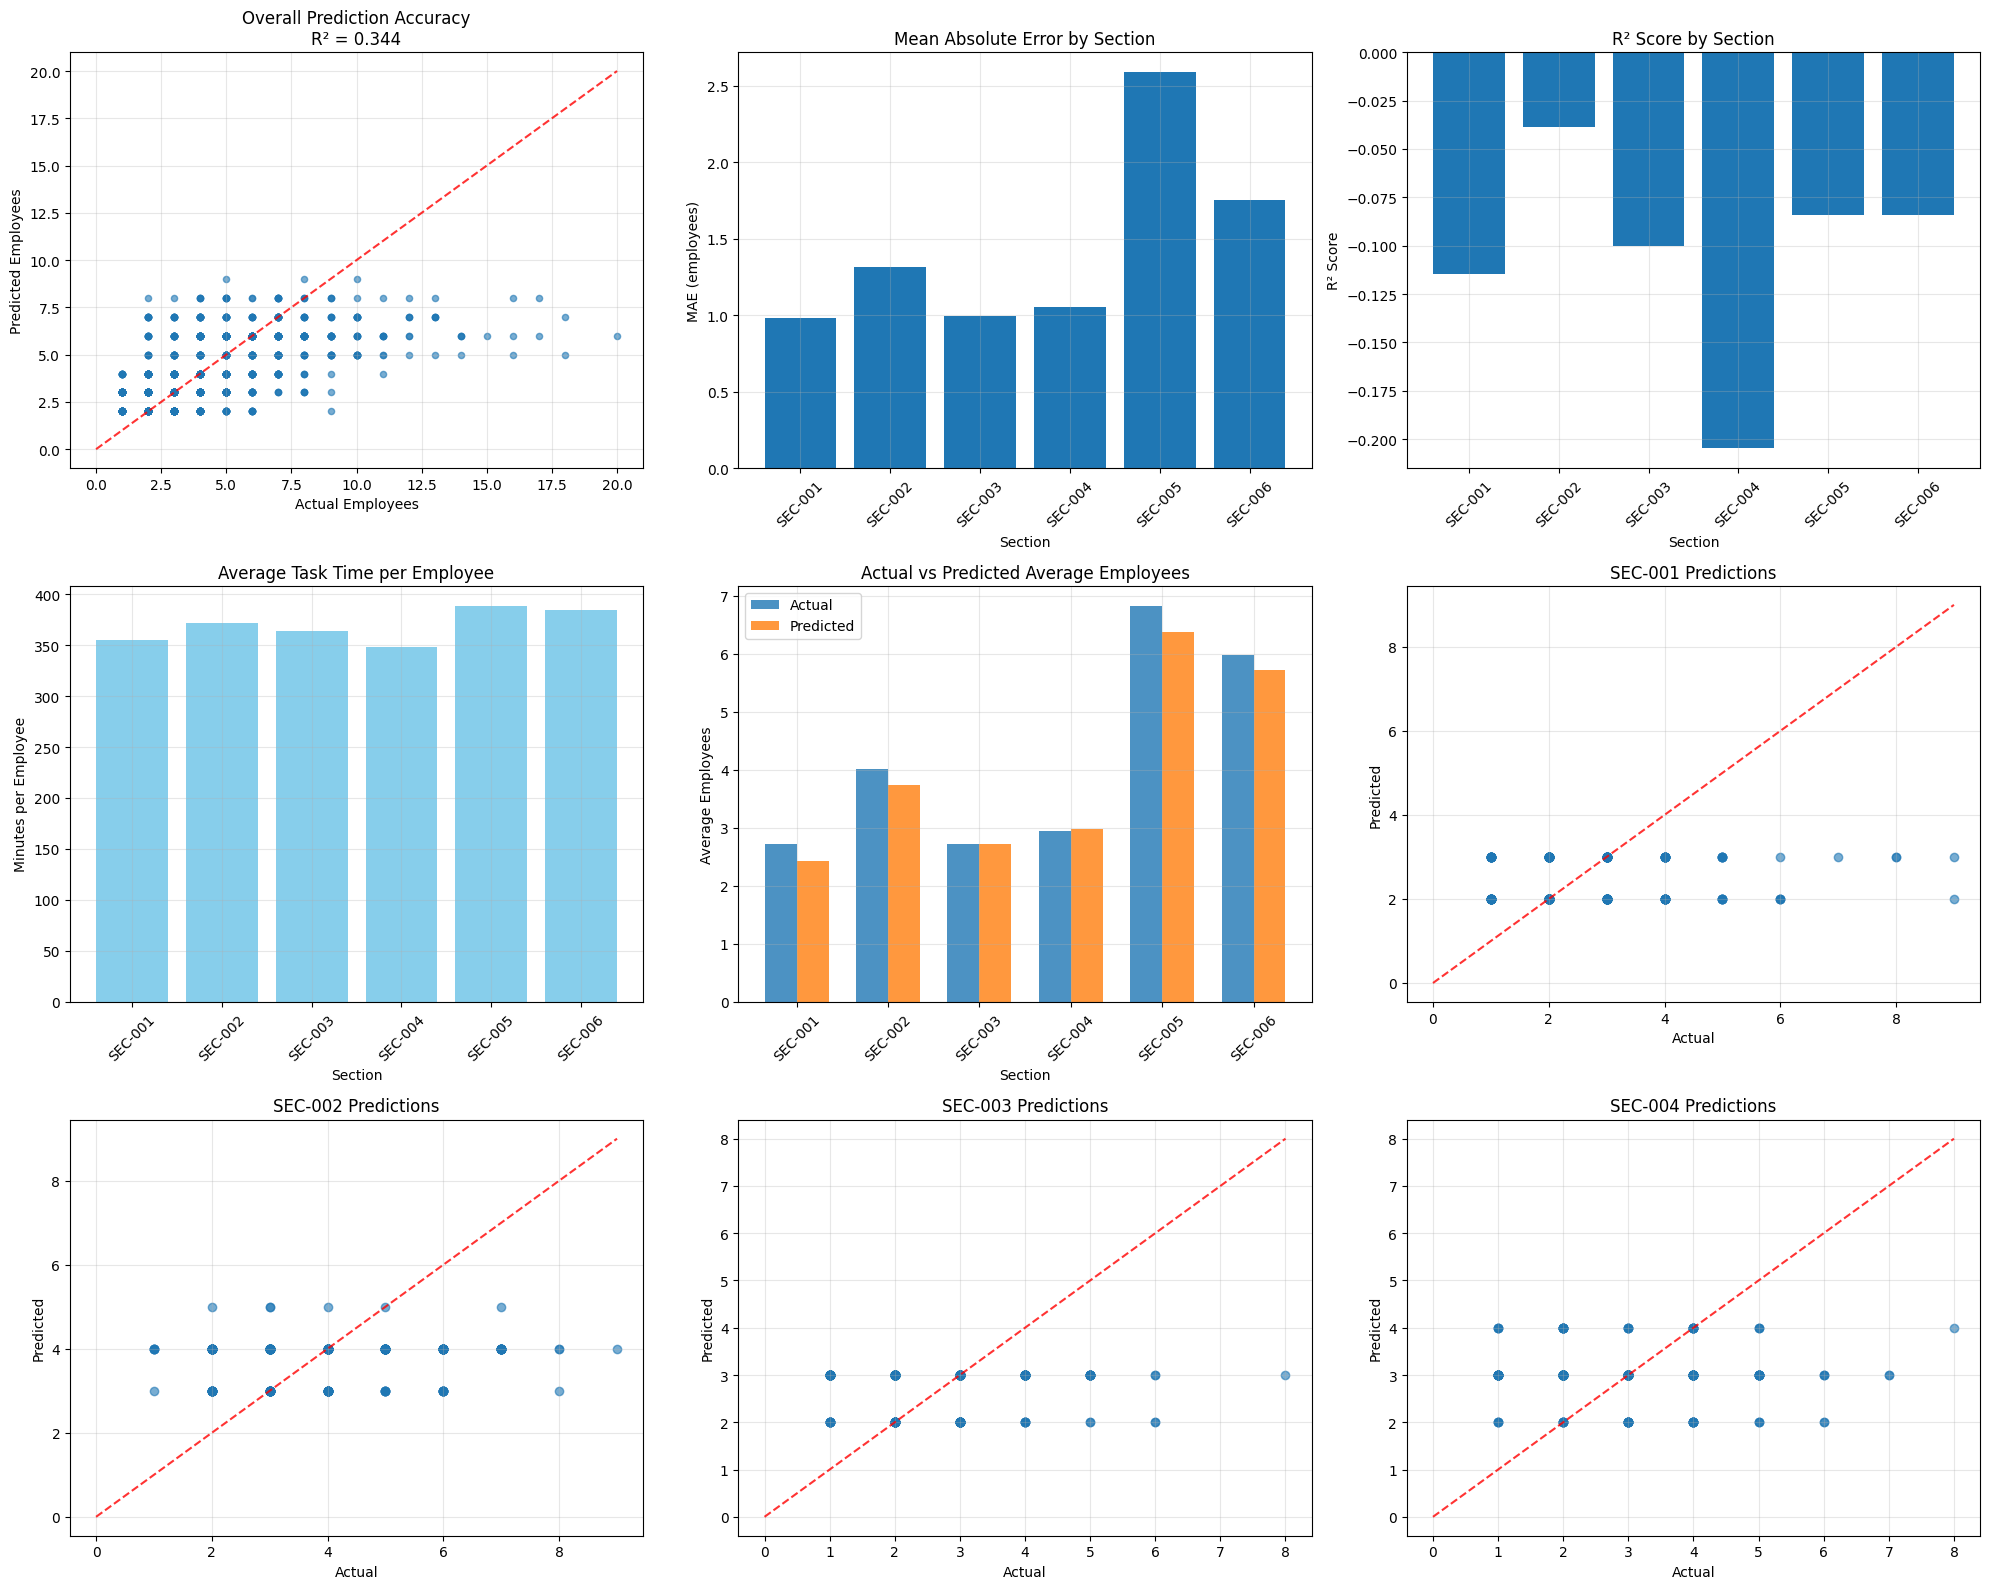

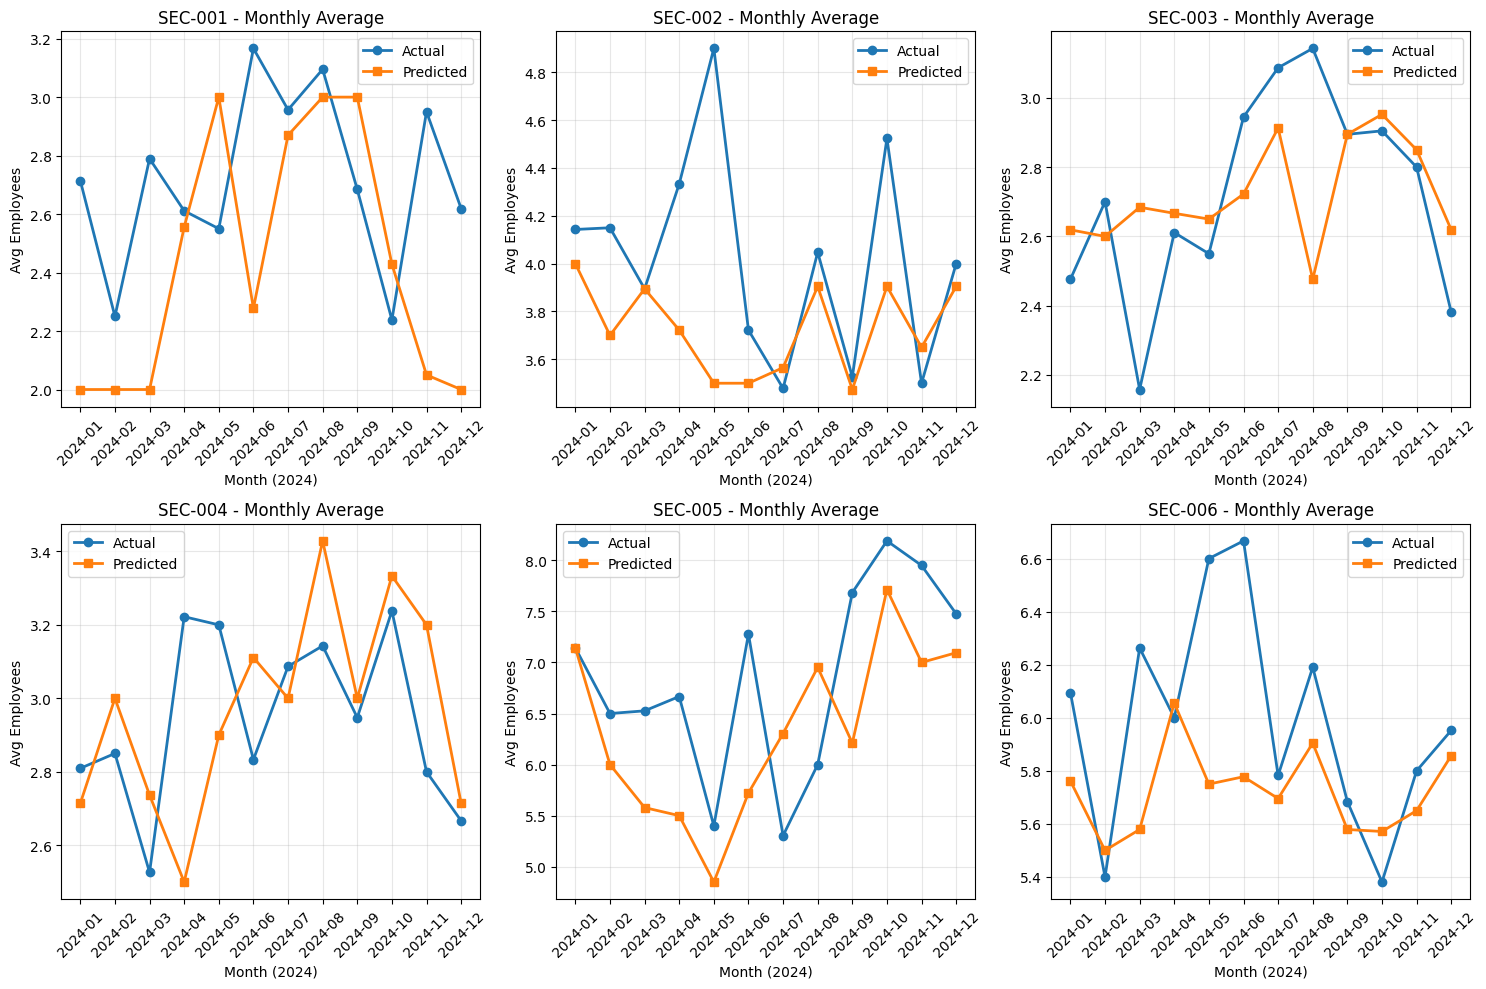


✅ VALIDATION COMPLETE!
📁 Files saved:
   - 2024_validation_predictions.csv
   - validation_performance_by_section.csv
   - model_validation_results.png
   - monthly_trends_comparison.png

📊 FINAL VALIDATION SUMMARY:
   Section    MAE   RMSE     R²  Avg_Task_Per_Employee  Working_Days  \
0  SEC-001  0.979  1.466 -0.114                354.539           241   
1  SEC-002  1.315  1.671 -0.039                371.926           241   
2  SEC-003  0.992  1.300 -0.100                364.230           241   
3  SEC-004  1.050  1.404 -0.205                348.404           241   
4  SEC-005  2.589  3.471 -0.084                388.537           241   
5  SEC-006  1.755  2.396 -0.084                384.215           241   

   Actual_Avg  Predicted_Avg  
0       2.718          2.436  
1       4.017          3.730  
2       2.726          2.722  
3       2.946          2.975  
4       6.826          6.369  
5       5.975          5.722  

⚠️  Consider model improvements before 2025 forecasting.


In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# =============================================================
# Load continuous DataFrame (2021-2024 data)
# =============================================================
df = pd.read_csv('final_df_binary.csv')
df['date'] = pd.to_datetime(df['date'])

# =============================================================
# Prepare features
# =============================================================
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['is_working_day'] = ((df['is_holiday'] == 0) & (df['is_weekend'] == 0)).astype(int)

# Train-Test Split
train_data = df[df['year'] <= 2023].copy()
test_data = df[df['year'] == 2024].copy()

print(f"🧪 MODEL TESTING SETUP:")
print(f"   Training data: {len(train_data):,} records (2021-2023)")
print(f"   Test data: {len(test_data):,} records (2024)")
print(f"   Sections: {df['section_id'].nunique()}")

# =============================================================
# Step 1: Analyze training data
# =============================================================
print("\n=== TRAINING DATA ANALYSIS (2021-2023) ===")
working_train = train_data[train_data['is_working_day'] == 1]

print("\n📊 CORRELATION ANALYSIS:")
correlations = {}
for section in working_train['section_id'].unique():
    section_data = working_train[working_train['section_id'] == section]
    if len(section_data) > 20:
        corr = section_data['employees_on_duty'].corr(section_data['total_task_time_minutes'])
        correlations[section] = corr
        print(f"   {section}: {corr:.3f}")

print(f"\n📈 TRAINING STATISTICS:")
stats = working_train.groupby('section_id').agg({
    'employees_on_duty': ['count', 'mean', 'std', 'min', 'max'],
    'total_task_time_minutes': ['mean', 'std']
}).round(2)

for section in stats.index:
    emp_stats = stats.loc[section, 'employees_on_duty']
    task_stats = stats.loc[section, 'total_task_time_minutes']
    print(f"   {section}:")
    print(f"      Working days: {emp_stats['count']:.0f}")
    print(f"      Employees: {emp_stats['mean']:.1f} ± {emp_stats['std']:.1f} (range: {emp_stats['min']:.0f}-{emp_stats['max']:.0f})")
    print(f"      Task time: {task_stats['mean']:.0f} ± {task_stats['std']:.0f} minutes")

# =============================================================
# Step 2: Build employee prediction models
# =============================================================
print("\n=== BUILDING MODELS FROM TRAINING DATA ===")

employee_models = {}
for section in working_train['section_id'].unique():
    section_data = working_train[working_train['section_id'] == section]

    if len(section_data) > 30:
        X = section_data[['total_task_time_minutes']].values
        y = section_data['employees_on_duty'].values

        model = HuberRegressor(epsilon=1.35)
        model.fit(X, y)

        valid_data = section_data[section_data['employees_on_duty'] > 0].copy()
        valid_data['task_per_emp'] = valid_data['total_task_time_minutes'] / valid_data['employees_on_duty']

        employee_models[section] = {
            'regression_model': model,
            'avg_task_per_employee': valid_data['task_per_emp'].median(),
            'min_employees': section_data['employees_on_duty'].min(),
            'max_employees': section_data['employees_on_duty'].max(),
            'training_r2': model.score(X, y)
        }

        print(f"   {section}: R² = {model.score(X, y):.3f}, Avg efficiency = {valid_data['task_per_emp'].median():.1f} min/emp")

# =============================================================
# Step 3: Forecast 2024 task time with Prophet
# =============================================================
print("\n=== FORECASTING 2024 TASK TIME ===")
task_forecasts = {}
task_time_models = {}

for section in working_train['section_id'].unique():
    print(f"   Forecasting {section}...")
    section_data = working_train[working_train['section_id'] == section].copy()

    if len(section_data) < 50:
        print(f"      ⚠️  Insufficient training data")
        continue

    prophet_df = section_data[['date', 'total_task_time_minutes']].copy()
    prophet_df.columns = ['ds', 'y']
    prophet_df = prophet_df.sort_values('ds')

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=8.0
    )

    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=3)
    model.fit(prophet_df)

    test_working = test_data[(test_data['section_id'] == section) & (test_data['is_working_day'] == 1)]['date'].values

    if len(test_working) > 0:
        future_df = pd.DataFrame({'ds': test_working})
        forecast = model.predict(future_df)
        forecast['yhat'] = forecast['yhat'].clip(lower=0)

        task_forecasts[section] = {
            'dates': test_working,
            'predictions': forecast['yhat'].values
        }

        task_time_models[section] = model
        print(f"      → Forecasted {len(test_working)} working days")

# =============================================================
# Step 4: Convert task time forecasts into employee predictions
# =============================================================
print("\n=== CONVERTING TO 2024 EMPLOYEE PREDICTIONS ===")

employee_predictions = {}
for section, forecast_data in task_forecasts.items():
    if section not in employee_models:
        continue

    model_info = employee_models[section]
    dates = forecast_data['dates']
    predicted_task_time = forecast_data['predictions']

    predicted_employees_reg = model_info['regression_model'].predict(predicted_task_time.reshape(-1, 1))
    predicted_employees_eff = predicted_task_time / model_info['avg_task_per_employee']

    r2_val = model_info['training_r2']
    weight_reg = 0.8 if r2_val > 0.9 else 0.6

    final_predictions = weight_reg * predicted_employees_reg + (1 - weight_reg) * predicted_employees_eff
    final_predictions = np.round(final_predictions).astype(int)
    final_predictions = np.clip(
        final_predictions,
        max(1, model_info['min_employees']),
        int(model_info['max_employees'] * 1.2)
    )

    employee_predictions[section] = {
        'dates': dates,
        'predictions': final_predictions
    }

# =============================================================
# Step 5: Create predictions DataFrame
# =============================================================
predictions_df = test_data.copy()
predictions_df['predicted_employee_count'] = 0

for section, pred_data in employee_predictions.items():
    for date, pred in zip(pred_data['dates'], pred_data['predictions']):
        mask = (predictions_df['section_id'] == section) & (predictions_df['date'] == date)
        predictions_df.loc[mask, 'predicted_employee_count'] = pred

predictions_df = predictions_df[['date', 'section_id', 'employees_on_duty', 
                                'total_task_time_minutes', 'predicted_employee_count', 'is_working_day']]

# =============================================================
# Step 6: Evaluate predictions
# =============================================================
print("\n=== COMPREHENSIVE EVALUATION ===")
working_predictions = predictions_df[predictions_df['is_working_day'] == 1].copy()

mae_overall = mean_absolute_error(working_predictions['employees_on_duty'], working_predictions['predicted_employee_count'])
rmse_overall = np.sqrt(mean_squared_error(working_predictions['employees_on_duty'], working_predictions['predicted_employee_count']))
r2_overall = r2_score(working_predictions['employees_on_duty'], working_predictions['predicted_employee_count'])

print(f"🎯 OVERALL PERFORMANCE:")
print(f"   MAE: {mae_overall:.2f} employees")
print(f"   RMSE: {rmse_overall:.2f} employees")
print(f"   R²: {r2_overall:.3f}")
print(f"   Records evaluated: {len(working_predictions):,}")

print(f"\n📊 SECTION-WISE PERFORMANCE:")
section_results = []
for section in working_predictions['section_id'].unique():
    section_data = working_predictions[working_predictions['section_id'] == section]
    if len(section_data) > 0:
        mae_section = mean_absolute_error(section_data['employees_on_duty'], section_data['predicted_employee_count'])
        rmse_section = np.sqrt(mean_squared_error(section_data['employees_on_duty'], section_data['predicted_employee_count']))
        r2_section = r2_score(section_data['employees_on_duty'], section_data['predicted_employee_count'])

        valid_section = section_data[section_data['employees_on_duty'] > 0].copy()
        avg_task_per_emp = (valid_section['total_task_time_minutes'] / valid_section['employees_on_duty']).mean()

        section_results.append({
            'Section': section,
            'MAE': mae_section,
            'RMSE': rmse_section,
            'R²': r2_section,
            'Avg_Task_Per_Employee': avg_task_per_emp,
            'Working_Days': len(section_data),
            'Actual_Avg': section_data['employees_on_duty'].mean(),
            'Predicted_Avg': section_data['predicted_employee_count'].mean()
        })

        print(f"   {section}:")
        print(f"      MAE: {mae_section:.2f}, RMSE: {rmse_section:.2f}, R²: {r2_section:.3f}")
        print(f"      Avg task/employee: {avg_task_per_emp:.1f} minutes")
        print(f"      Actual avg: {section_data['employees_on_duty'].mean():.1f}, Predicted avg: {section_data['predicted_employee_count'].mean():.1f}")

section_results_df = pd.DataFrame(section_results)

# =============================================================
# Step 7: Visualizations
# =============================================================
print("\n=== CREATING VISUALIZATIONS ===")
fig = plt.figure(figsize=(20, 16))

plt.subplot(3, 3, 1)
plt.scatter(working_predictions['employees_on_duty'], working_predictions['predicted_employee_count'], alpha=0.6, s=20)
plt.plot([0, working_predictions['employees_on_duty'].max()], [0, working_predictions['employees_on_duty'].max()], 'r--', alpha=0.8)
plt.xlabel('Actual Employees')
plt.ylabel('Predicted Employees')
plt.title(f'Overall Prediction Accuracy\nR² = {r2_overall:.3f}')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
plt.bar(section_results_df['Section'], section_results_df['MAE'])
plt.xlabel('Section')
plt.ylabel('MAE (employees)')
plt.title('Mean Absolute Error by Section')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 3)
plt.bar(section_results_df['Section'], section_results_df['R²'])
plt.xlabel('Section')
plt.ylabel('R² Score')
plt.title('R² Score by Section')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 4)
plt.bar(section_results_df['Section'], section_results_df['Avg_Task_Per_Employee'], color='skyblue')
plt.xlabel('Section')
plt.ylabel('Minutes per Employee')
plt.title('Average Task Time per Employee')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
x = np.arange(len(section_results_df))
width = 0.35
plt.bar(x - width/2, section_results_df['Actual_Avg'], width, label='Actual', alpha=0.8)
plt.bar(x + width/2, section_results_df['Predicted_Avg'], width, label='Predicted', alpha=0.8)
plt.xlabel('Section')
plt.ylabel('Average Employees')
plt.title('Actual vs Predicted Average Employees')
plt.xticks(x, section_results_df['Section'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

sections = working_predictions['section_id'].unique()[:4]
for i, section in enumerate(sections, 6):
    plt.subplot(3, 3, i)
    section_data = working_predictions[working_predictions['section_id'] == section]
    plt.scatter(section_data['employees_on_duty'], section_data['predicted_employee_count'], alpha=0.6)
    plt.plot([0, section_data['employees_on_duty'].max()], [0, section_data['employees_on_duty'].max()], 'r--', alpha=0.8)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{section} Predictions')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_validation_results.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
working_predictions['year_month'] = working_predictions['date'].dt.to_period('M')
monthly_comparison = working_predictions.groupby(['year_month', 'section_id']).agg({
    'employees_on_duty': 'mean',
    'predicted_employee_count': 'mean'
}).reset_index()

sections = monthly_comparison['section_id'].unique()
for i, section in enumerate(sections):
    plt.subplot(2, 3, i+1)
    section_monthly = monthly_comparison[monthly_comparison['section_id'] == section]
    plt.plot(section_monthly['year_month'].astype(str), section_monthly['employees_on_duty'], 'o-', label='Actual', linewidth=2)
    plt.plot(section_monthly['year_month'].astype(str), section_monthly['predicted_employee_count'], 's-', label='Predicted', linewidth=2)
    plt.title(f'{section} - Monthly Average')
    plt.xlabel('Month (2024)')
    plt.ylabel('Avg Employees')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monthly_trends_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================
# Step 8: Save results
# =============================================================
predictions_df.to_csv('2024_validation_predictions.csv', index=False)
section_results_df.to_csv('validation_performance_by_section.csv', index=False)

print("\n✅ VALIDATION COMPLETE!")
print(f"📁 Files saved:")
print(f"   - 2024_validation_predictions.csv")
print(f"   - validation_performance_by_section.csv")
print(f"   - model_validation_results.png")
print(f"   - monthly_trends_comparison.png")

print("\n📊 FINAL VALIDATION SUMMARY:")
print(section_results_df.round(3))

if mae_overall < 1.0:
    print("\n✅ Model performance acceptable! Ready for 2025 forecasting.")
else:
    print("\n⚠️  Consider model improvements before 2025 forecasting.")


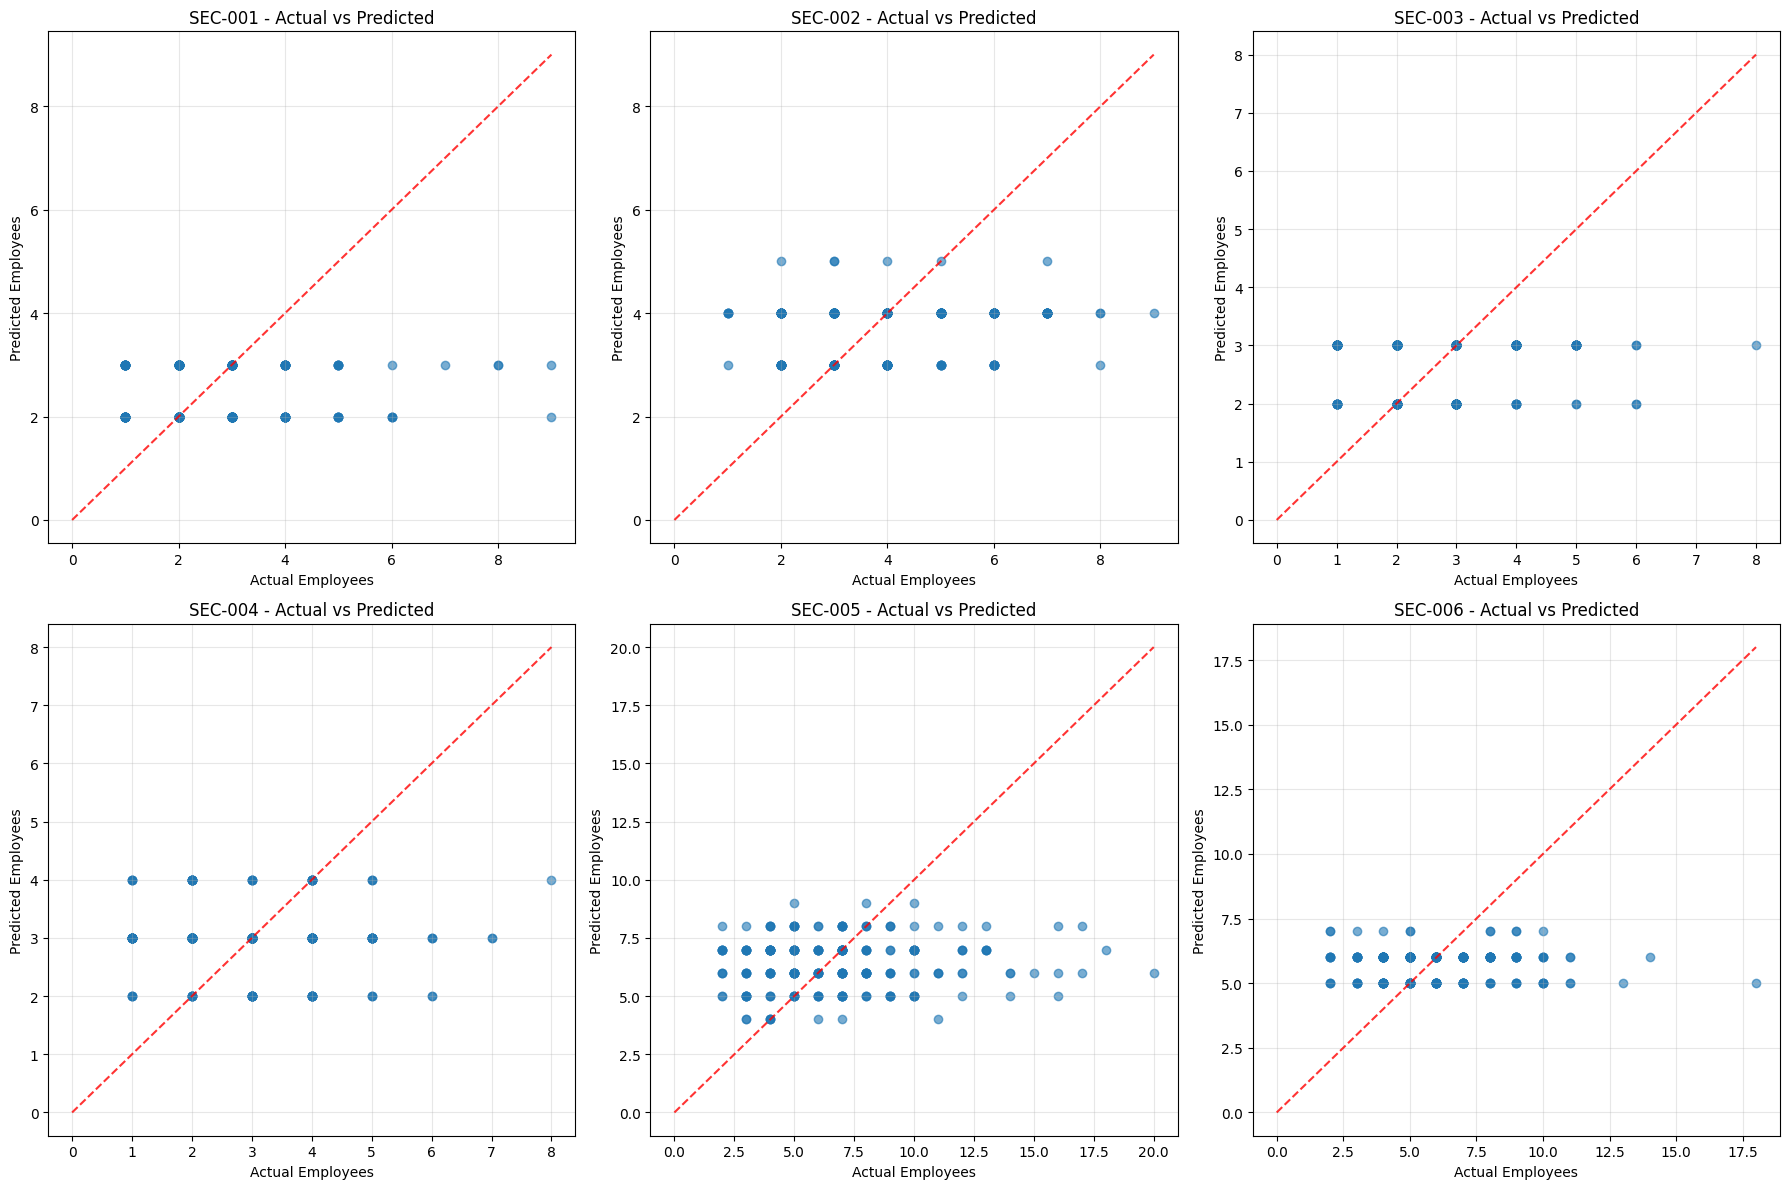

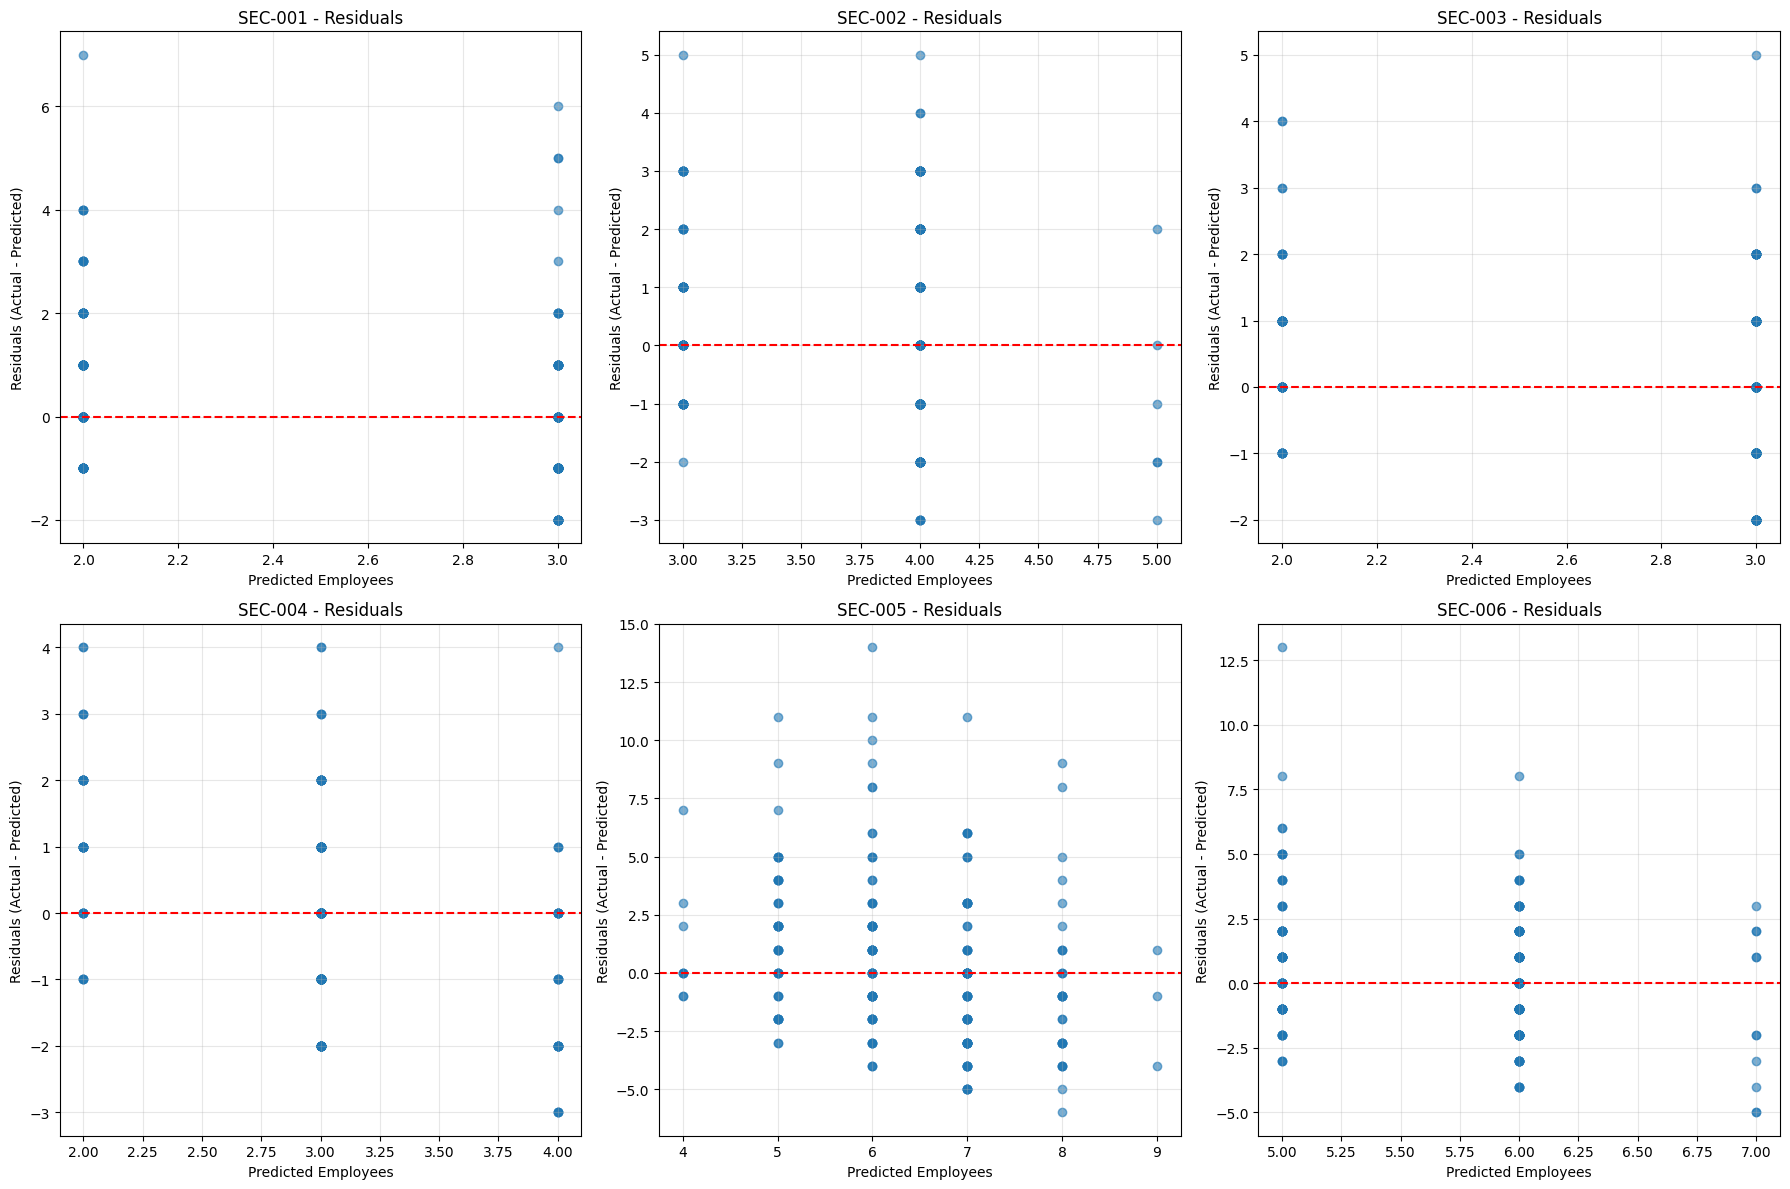

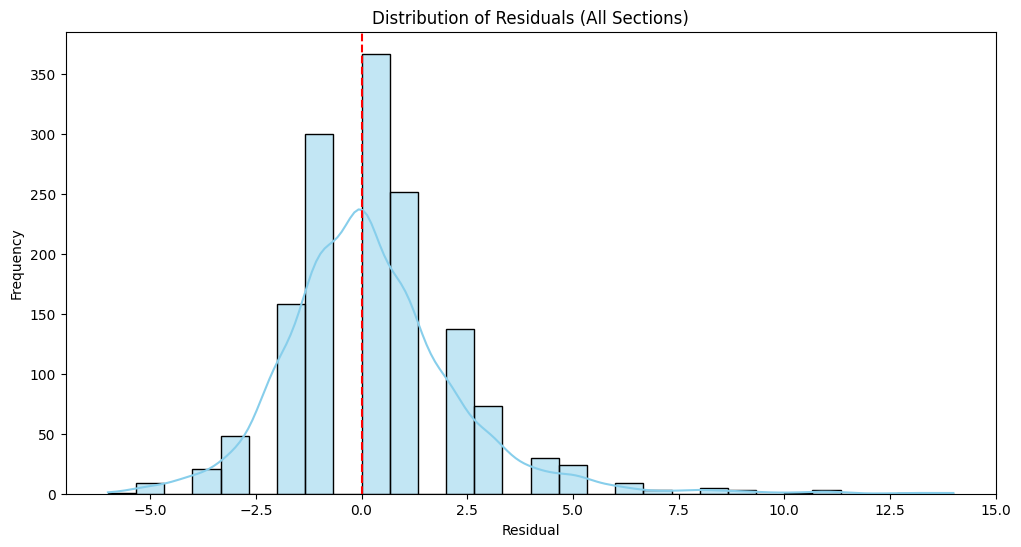

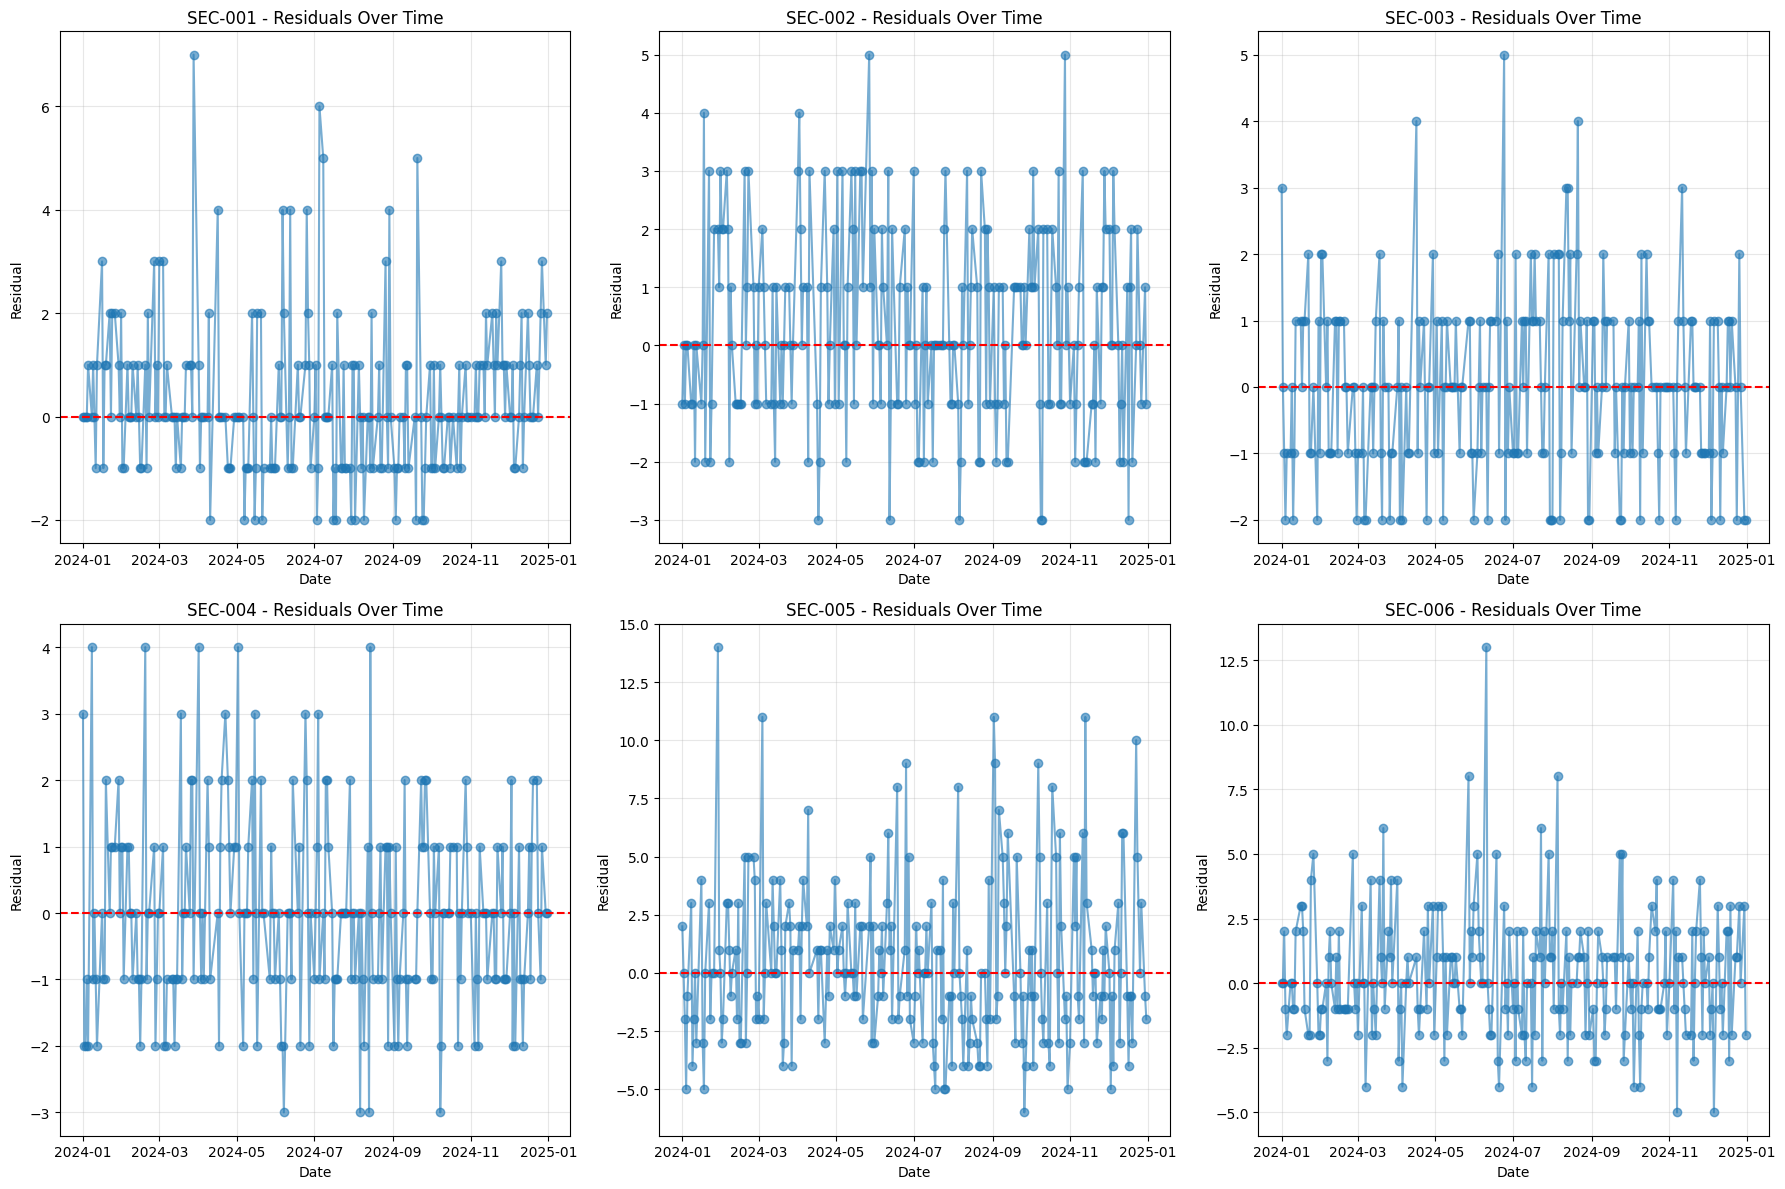

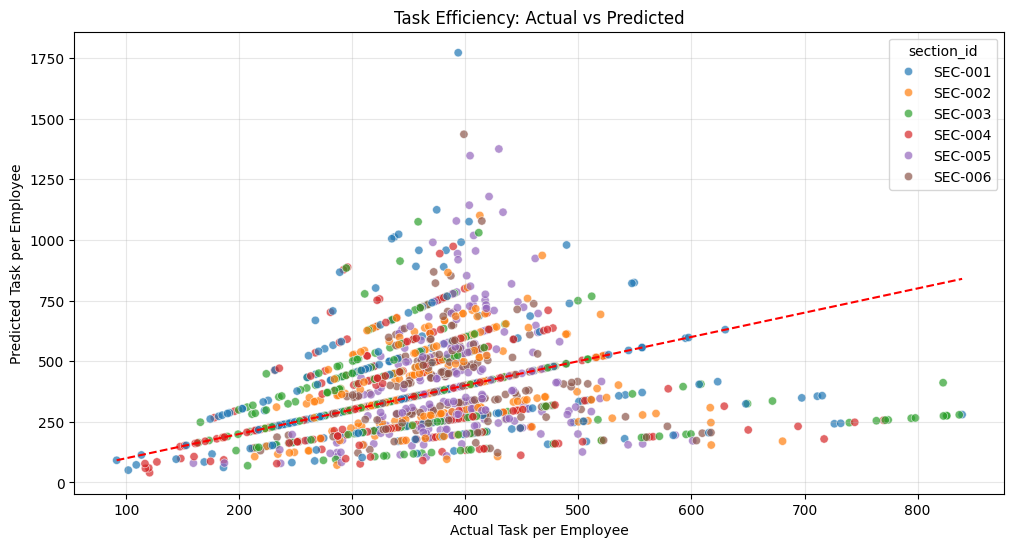

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Focus on working days
working_predictions = predictions_df[predictions_df['is_working_day'] == 1].copy()

# 1️⃣ Scatter plot: Actual vs Predicted (per section)
sections = working_predictions['section_id'].unique()
plt.figure(figsize=(18, 12))
for i, section in enumerate(sections, 1):
    section_data = working_predictions[working_predictions['section_id'] == section]
    plt.subplot(2, 3, i)
    plt.scatter(section_data['employees_on_duty'], 
                section_data['predicted_employee_count'], alpha=0.6)
    max_val = max(section_data['employees_on_duty'].max(), 
                  section_data['predicted_employee_count'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.8)
    plt.xlabel('Actual Employees')
    plt.ylabel('Predicted Employees')
    plt.title(f'{section} - Actual vs Predicted')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2️⃣ Residual analysis
working_predictions['residual'] = working_predictions['employees_on_duty'] - working_predictions['predicted_employee_count']

plt.figure(figsize=(18, 12))
for i, section in enumerate(sections, 1):
    section_data = working_predictions[working_predictions['section_id'] == section]
    plt.subplot(2, 3, i)
    plt.scatter(section_data['predicted_employee_count'], 
                section_data['residual'], alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Employees')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'{section} - Residuals')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3️⃣ Distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(working_predictions['residual'], bins=30, kde=True, color='skyblue')
plt.axvline(0, color='r', linestyle='--')
plt.title('Distribution of Residuals (All Sections)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# 4️⃣ Time trend: Residuals over time
plt.figure(figsize=(18, 12))
for i, section in enumerate(sections, 1):
    section_data = working_predictions[working_predictions['section_id'] == section]
    plt.subplot(2, 3, i)
    plt.plot(section_data['date'], section_data['residual'], 'o-', alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.title(f'{section} - Residuals Over Time')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5️⃣ Correlation between predicted and actual task efficiency
working_predictions['task_per_emp_actual'] = working_predictions['total_task_time_minutes'] / working_predictions['employees_on_duty']
working_predictions['task_per_emp_predicted'] = working_predictions['total_task_time_minutes'] / working_predictions['predicted_employee_count']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='task_per_emp_actual', y='task_per_emp_predicted', hue='section_id', data=working_predictions, alpha=0.7)
plt.plot([working_predictions['task_per_emp_actual'].min(), working_predictions['task_per_emp_actual'].max()],
         [working_predictions['task_per_emp_actual'].min(), working_predictions['task_per_emp_actual'].max()], 'r--')
plt.xlabel('Actual Task per Employee')
plt.ylabel('Predicted Task per Employee')
plt.title('Task Efficiency: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()
